In [2]:
import yfinance as yf # yfinance is yahooFinance, a library that provides you with api to download daily stock prices/indices

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sp500 = yf.Ticker("^GSPC") # ticker helps us to download stock prices of given stock. GSPC refers to S&P500


In [4]:
sp500 = sp500.history(period='max') # max periiod means to download all prices since the start of S&P500

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,0.0,0.0
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,0.0,0.0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,0.0,0.0


In [6]:
# it has date-time index
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-10-16 00:00:00-04:00', '2023-10-17 00:00:00-04:00',
               '2023-10-18 00:00:00-04:00', '2023-10-19 00:00:00-04:00',
               '2023-10-20 00:00:00-04:00', '2023-10-23 00:00:00-04:00',
               '2023-10-24 00:00:00-04:00', '2023-10-25 00:00:00-04:00',
               '2023-10-26 00:00:00-04:00', '2023-10-27 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24072, freq=None)

### Cleaning

**We will not be needing dividend and stock splits columns for now so let's remove those columns**

In [7]:
sp500.drop(['Dividends', 'Stock Splits'],axis=1, inplace=True)
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000


### Plotting

<Axes: xlabel='Date'>

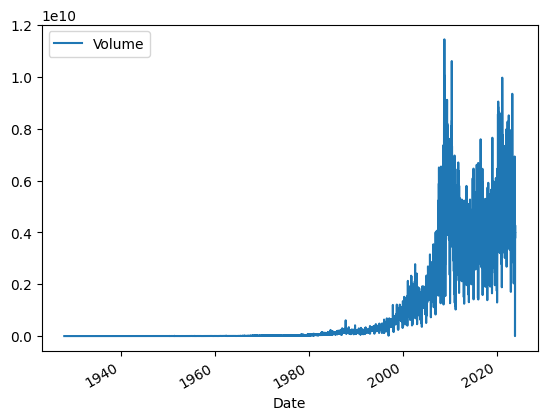

In [8]:
sp500.plot.line(y="Volume", use_index=True)

<Axes: xlabel='Date'>

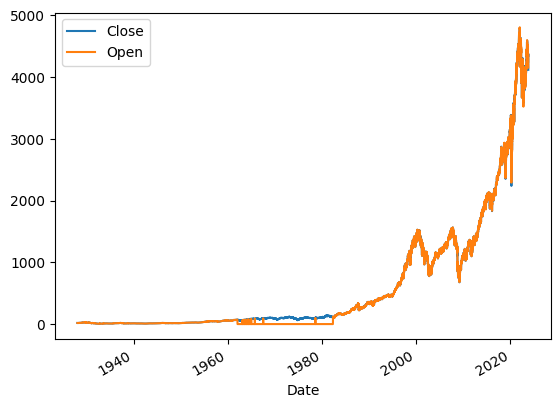

In [9]:
sp500.plot.line(y=["Close","Open"], use_index=True)

<Axes: xlabel='Date'>

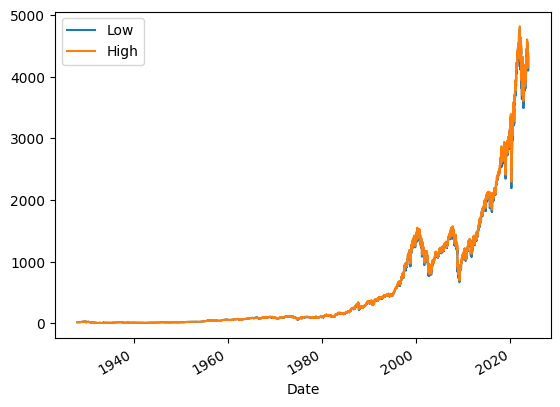

In [10]:
sp500.plot.line(y=["Low","High"], use_index=True)

In [11]:
sp1985 = sp500.iloc[14000:]

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.08, subplot_titles=('S&P500', 'Volume'),
               row_width=[0.2, 0.7])

# Plot data
fig.add_trace(go.Candlestick(x=sp1985.index, open=sp1985["Open"], high=sp1985["High"],
                low=sp1985["Low"], close=sp1985["Close"], name="S&P"),
                row=1, col=1)

fig.update_layout(
    title="S&P500 since 1985",
    yaxis_title="S&P500 Stock Price")

# Plot volume
fig.add_trace(go.Bar(x=sp1985.index, y=sp1985['Volume'], showlegend=False), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

### Concepts


1. Tomorrow is for pewdicting tomorrow's price as today's closing price

In [12]:
sp500['tomorrow'] = sp500["Close"].shift(-1)
sp500.head()

,Open,High,Low,Close,Volume,tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [13]:
sp500.tail()

,Open,High,Low,Close,Volume,tomorrow
Date,,,,,,
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,4117.370117
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,NaN


Target = If tomorrow price rises compared to today or falls.

In [14]:
sp500['target'] = (sp500['tomorrow']>sp500['Close']).astype(int) # boolean into integer
sp500.tail()

,Open,High,Low,Close,Volume,tomorrow,target
Date,,,,,,,
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176,1
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020,0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980,0
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,4117.370117,0
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,NaN,0


In [15]:
sp = sp500.loc["1985-01-01":].copy()

In [16]:
sp

,Open,High,Low,Close,Volume,tomorrow,target
Date,,,,,,,
1985-01-02 00:00:00-05:00,167.199997,167.199997,165.190002,165.369995,67820000,164.570007,0
1985-01-03 00:00:00-05:00,165.369995,166.110001,164.380005,164.570007,88880000,163.679993,0
1985-01-04 00:00:00-05:00,164.550003,164.550003,163.360001,163.679993,77480000,164.240005,1
1985-01-07 00:00:00-05:00,163.679993,164.710007,163.679993,164.240005,86190000,163.990005,0
1985-01-08 00:00:00-05:00,164.240005,164.589996,163.910004,163.990005,92110000,165.179993,1
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176,1
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020,0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980,0


## Model Building

In [17]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

train = sp.iloc[:-500]
test = sp.iloc[-500:]

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=31)

predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors],train['target'])

RandomForestClassifier(min_samples_split=100, random_state=31)

In [18]:
from sklearn.metrics import precision_score

In [19]:
preds = model.predict(test[predictors])

In [20]:
preds = pd.Series(preds, index = test.index)
preds

Date
2021-11-02 00:00:00-04:00    1
2021-11-03 00:00:00-04:00    1
2021-11-04 00:00:00-04:00    1
2021-11-05 00:00:00-04:00    1
2021-11-08 00:00:00-05:00    1
                            ..
2023-10-23 00:00:00-04:00    0
2023-10-24 00:00:00-04:00    1
2023-10-25 00:00:00-04:00    0
2023-10-26 00:00:00-04:00    1
2023-10-27 00:00:00-04:00    1
Length: 500, dtype: int64

In [21]:
precision_score(test['target'], preds)

0.45695364238410596

In [22]:
combined = pd.concat([test['target'] , preds], axis=1)

In [23]:
test.head()

,Open,High,Low,Close,Volume,tomorrow,target
Date,,,,,,,
2021-11-02 00:00:00-04:00,4613.339844,4635.149902,4613.339844,4630.649902,3975250000,4660.569824,1
2021-11-03 00:00:00-04:00,4630.649902,4663.459961,4621.189941,4660.569824,4319660000,4680.060059,1
2021-11-04 00:00:00-04:00,4662.930176,4683.000000,4662.589844,4680.060059,4462300000,4697.529785,1
2021-11-05 00:00:00-04:00,4699.259766,4718.500000,4681.319824,4697.529785,4467180000,4701.700195,1
2021-11-08 00:00:00-05:00,4701.479980,4714.919922,4694.390137,4701.700195,4269710000,4685.250000,0


In [24]:
combined

,target,0
Date,,
2021-11-02 00:00:00-04:00,1,1
2021-11-03 00:00:00-04:00,1,1
2021-11-04 00:00:00-04:00,1,1
2021-11-05 00:00:00-04:00,1,1
2021-11-08 00:00:00-05:00,0,1
...,...,...
2023-10-23 00:00:00-04:00,1,0
2023-10-24 00:00:00-04:00,0,1
2023-10-25 00:00:00-04:00,0,0


In [25]:
combined.columns = ["Target", "Prediction"]

In [26]:
combined

,Target,Prediction
Date,,
2021-11-02 00:00:00-04:00,1,1
2021-11-03 00:00:00-04:00,1,1
2021-11-04 00:00:00-04:00,1,1
2021-11-05 00:00:00-04:00,1,1
2021-11-08 00:00:00-05:00,0,1
...,...,...
2023-10-23 00:00:00-04:00,1,0
2023-10-24 00:00:00-04:00,0,1
2023-10-25 00:00:00-04:00,0,0


In [27]:
def predict(train, test, predictors, model):
  model.fit(train[predictors],train['target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([preds, test["target"]],axis=1)
  combined.columns=["Predictions", "Target"]
  return combined

In [28]:
sp.loc["2000-01-01":"2001-01-01"]

,Open,High,Low,Close,Volume,tomorrow,target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2000-12-22 00:00:00-05:00,1274.859985,1305.969971,1274.859985,1305.949951,1087100000,1315.189941,1
2000-12-26 00:00:00-05:00,1305.969971,1315.939941,1301.640015,1315.189941,806500000,1328.920044,1
2000-12-27 00:00:00-05:00,1315.189941,1332.030029,1310.959961,1328.920044,1092700000,1334.219971,1


In [29]:

print("Columns:",sp.loc["2000-01-01":"2001-01-01"].shape[1])
print("Rows:",sp.loc["2000-01-01":"2001-01-01"].shape[0])

Columns: 7
Rows: 252


As seen, a year has around 250 trading days. So to build a good model that predicts values based on years before it, we will create a backtracking function. It will predict outcome for a year with data from years before that.

In [30]:
def backtest(data, model, predictors, start=2500, step=250):
  #  250 days= 1 trading year, 2500days = 10 years
  all_predictions=[]

  for i in range(start,data.shape[0],step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [31]:
predictions = backtest(sp,model,predictors)
predictions

,Predictions,Target
Date,,
1994-11-21 00:00:00-05:00,1,0
1994-11-22 00:00:00-05:00,0,0
1994-11-23 00:00:00-05:00,0,1
1994-11-25 00:00:00-05:00,0,1
1994-11-28 00:00:00-05:00,1,1
...,...,...
2023-10-23 00:00:00-04:00,0,1
2023-10-24 00:00:00-04:00,1,0
2023-10-25 00:00:00-04:00,1,0


In [32]:
predictions['Predictions'].value_counts()


0    4182
1    3103
Name: Predictions, dtype: int64

In [33]:
predictions['Target'].value_counts() / predictions.shape[0] # gives percentage of how the target were

1    0.537131
0    0.462869
Name: Target, dtype: float64

In [34]:
precision_score(predictions["Target"],predictions["Predictions"])

0.529809861424428

## Seems like our model performed not very good.
If we were to buy every single day and sell it at the end of the day, we would be better off than using our model at this time instant.

## Adding more Predictors (Rolling Average and other functions)

In [35]:
horizons = [2,5,21,42,250,1000] # 2 days,  5 days (week), 1 month, 2 months, 1 year, 4 years -> approx in terms of trading days/years

new_predictors = []

for horizon in horizons:
  rolling_averages = sp.rolling(horizon).mean()

  ratio_col = f"Close_Ratio_{horizon}"
  sp[ratio_col] = sp["Close"] / rolling_averages["Close"]

  trend_col = f"Trend_{horizon}"
  sp[trend_col] = sp.shift(1).rolling(horizon).sum()["target"]

  new_predictors += [ratio_col, trend_col]

In [36]:
sp

,Open,High,Low,Close,Volume,tomorrow,target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_21,Trend_21,Close_Ratio_42,Trend_42,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1985-01-02 00:00:00-05:00,167.199997,167.199997,165.190002,165.369995,67820000,164.570007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-03 00:00:00-05:00,165.369995,166.110001,164.380005,164.570007,88880000,163.679993,0,0.997575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-04 00:00:00-05:00,164.550003,164.550003,163.360001,163.679993,77480000,164.240005,1,0.997289,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-07 00:00:00-05:00,163.679993,164.710007,163.679993,164.240005,86190000,163.990005,0,1.001708,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-08 00:00:00-05:00,164.240005,164.589996,163.910004,163.990005,92110000,165.179993,1,0.999238,1.0,0.997688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176,1,0.999157,0.0,0.984968,0.0,0.980160,10.0,0.963661,20.0,1.011555,123.0,1.079336,528.0
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020,0,1.003620,1.0,0.997976,1.0,0.988264,10.0,0.971343,21.0,1.018525,123.0,1.086850,528.0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980,0,0.992778,1.0,0.989609,1.0,0.975029,10.0,0.958557,20.0,1.003576,123.0,1.070961,527.0


In [37]:
sp = sp.dropna()
sp

,Open,High,Low,Close,Volume,tomorrow,target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_21,Trend_21,Close_Ratio_42,Trend_42,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1988-12-15 00:00:00-05:00,275.320007,275.619995,274.010010,274.279999,136820000,276.290009,1,0.998126,0.0,0.994164,1.0,1.008949,11.0,0.999440,22.0,1.035299,136.0,1.124908,553.0
1988-12-16 00:00:00-05:00,274.279999,276.290009,274.279999,276.290009,196480000,278.910004,1,1.003651,1.0,1.001987,1.0,1.014128,12.0,1.007035,22.0,1.042471,136.0,1.132632,554.0
1988-12-19 00:00:00-05:00,276.290009,279.309998,275.609985,278.910004,162250000,277.470001,0,1.004719,2.0,1.009739,2.0,1.021191,12.0,1.016413,23.0,1.051948,136.0,1.142833,555.0
1988-12-20 00:00:00-05:00,278.910004,280.450012,277.470001,277.470001,161090000,277.380005,0,0.997412,1.0,1.003682,2.0,1.013974,11.0,1.011640,22.0,1.046115,136.0,1.136405,554.0
1988-12-21 00:00:00-05:00,277.470001,277.829987,276.299988,277.380005,147250000,276.869995,0,0.999838,0.0,1.001856,2.0,1.011680,11.0,1.011864,21.0,1.045274,136.0,1.135509,554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20 00:00:00-04:00,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,4217.040039,0,0.993668,0.0,0.979466,1.0,0.980697,10.0,0.964140,21.0,1.013671,124.0,1.081485,528.0
2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,4247.680176,1,0.999157,0.0,0.984968,0.0,0.980160,10.0,0.963661,20.0,1.011555,123.0,1.079336,528.0
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,4186.770020,0,1.003620,1.0,0.997976,1.0,0.988264,10.0,0.971343,21.0,1.018525,123.0,1.086850,528.0


# **Update Model**

In [40]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=13)

In [41]:
def predict(train, test, predictors, model):
  model.fit(train[predictors],train['target'])
  preds = model.predict_proba(test[predictors])[:,1] # instead of thresholding at .5, we will make a model with more better score so we are retreving probability of predictions
        # [:,1] gives probabilities
  preds[preds >= 0.6] =1
  preds[preds < 0.6] =0

  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([preds, test["target"]],axis=1)
  combined.columns=["Predictions", "Target"]
  return combined

In [42]:
predictors

['Close', 'Volume', 'Open', 'High', 'Low']

In [43]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_21',
 'Trend_21',
 'Close_Ratio_42',
 'Trend_42',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [44]:
predictors += new_predictors
predictors

['Close',
 'Volume',
 'Open',
 'High',
 'Low',
 'Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_21',
 'Trend_21',
 'Close_Ratio_42',
 'Trend_42',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [45]:
predictions_new = backtest(sp, model, new_predictors)

In [46]:
predictions_all = backtest(sp, model, predictors)

In [47]:
predictions_new["Predictions"].value_counts()

0.0    5280
1.0    1004
Name: Predictions, dtype: int64

In [48]:
predictions_all["Predictions"].value_counts()

0.0    5791
1.0     493
Name: Predictions, dtype: int64

In [51]:
precision_score(predictions_new["Target"], predictions_new["Predictions"])

0.5527888446215139

In [50]:
precision_score(predictions_all["Target"], predictions_all["Predictions"])

0.5172413793103449